In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 342M/346M [00:02<00:00, 140MB/s]
100% 346M/346M [00:03<00:00, 121MB/s]


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [1]:
import zipfile
zip_data = zipfile.ZipFile('/content/intel-image-classification.zip')
zip_data.extractall('/content/')
zip_data.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from keras.layers import Dropout, BatchNormalization
import numpy as np

In [3]:
img= cv2.imread('/content/seg_test/seg_test/glacier/20211.jpg')
img

array([[[253, 236, 249],
        [255, 246, 255],
        [255, 249, 255],
        ...,
        [242, 239, 241],
        [239, 240, 244],
        [234, 237, 241]],

       [[240, 226, 232],
        [247, 233, 237],
        [239, 226, 228],
        ...,
        [241, 236, 238],
        [241, 237, 242],
        [232, 231, 235]],

       [[255, 255, 249],
        [255, 247, 238],
        [231, 214, 205],
        ...,
        [240, 230, 236],
        [238, 229, 232],
        [232, 225, 228]],

       ...,

       [[ 65,  65,  65],
        [ 70,  68,  68],
        [ 89,  81,  81],
        ...,
        [ 56,  64,  64],
        [ 60,  72,  74],
        [ 52,  65,  67]],

       [[ 58,  59,  57],
        [ 38,  36,  35],
        [ 60,  52,  52],
        ...,
        [ 54,  59,  60],
        [ 45,  54,  57],
        [ 53,  65,  67]],

       [[ 74,  75,  73],
        [ 74,  72,  71],
        [ 43,  35,  35],
        ...,
        [ 24,  29,  30],
        [ 56,  65,  68],
        [ 56,  68,  70]]

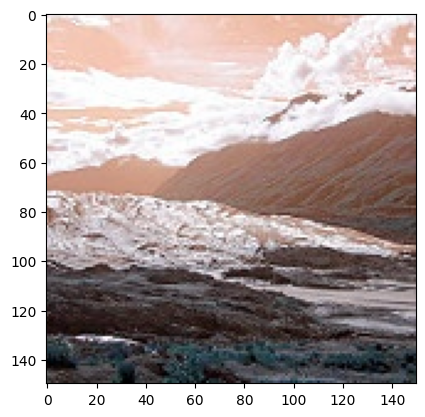

In [4]:
plt.imshow(img)

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/seg_train/seg_train',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    '/content/seg_test/seg_test',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
classes=['buildings','forest','glacier','mountain','sea','street']


In [8]:
len(train_generator)

439

In [9]:

print('Number of batches: ',len(train_generator))

Number of batches:  439


In [10]:
x_train,y_train=train_generator.next()

In [11]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
x_train.shape

(32, 256, 256, 3)

In [13]:
y_train.shape

(32, 6)

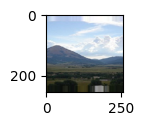

In [14]:
plt.figure(figsize=(5,1))
plt.imshow(x_train[1])

In [15]:
classes[np.argmax(y_train[1])]

'mountain'

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3))),

model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid')),

model.add(Conv2D(64, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3))),
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid')),

model.add(Conv2D(128, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3))),
model.add(MaxPooling2D(pool_size=(2,2) , strides=2, padding='valid')),

model.add(Flatten()),

model.add(Dense(128, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(6, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [18]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics='accuracy')

In [19]:
spe=len(train_generator)

In [20]:
mod=model.fit(train_generator, steps_per_epoch=spe, epochs=7, validation_data=validation_generator)

Epoch 1/7
439/439 [==============================] - 221s 489ms/step - loss: 1.0092 - accuracy: 0.6081 - val_loss: 0.7675 - val_accuracy: 0.7153
Epoch 2/7
439/439 [==============================] - 216s 491ms/step - loss: 0.7118 - accuracy: 0.7344 - val_loss: 0.6257 - val_accuracy: 0.7750
Epoch 3/7
439/439 [==============================] - 228s 519ms/step - loss: 0.5935 - accuracy: 0.7820 - val_loss: 0.4996 - val_accuracy: 0.8297
Epoch 4/7
439/439 [==============================] - 221s 504ms/step - loss: 0.5197 - accuracy: 0.8090 - val_loss: 0.5003 - val_accuracy: 0.8250
Epoch 5/7
439/439 [==============================] - 214s 487ms/step - loss: 0.4815 - accuracy: 0.8289 - val_loss: 0.4805 - val_accuracy: 0.8343
Epoch 6/7
439/439 [==============================] - 211s 482ms/step - loss: 0.4308 - accuracy: 0.8465 - val_loss: 0.5108 - val_accuracy: 0.8290
Epoch 7/7
439/439 [==============================] - 213s 485ms/step - loss: 0.4002 - accuracy: 0.8538 - val_loss: 0.4268 - val_ac

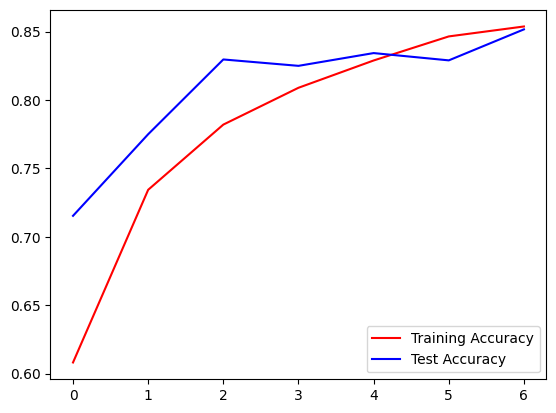

In [21]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()


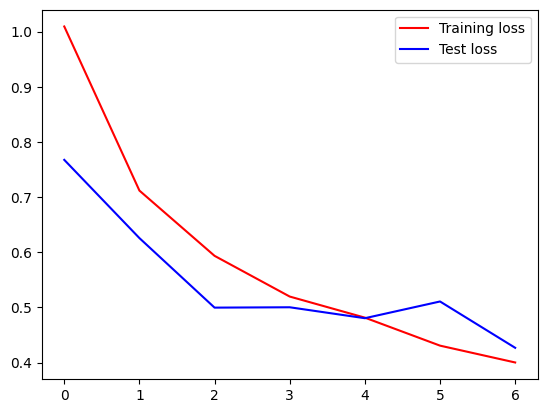

In [22]:

plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [23]:
test_img=cv2.imread('/content/seg_test/seg_test/street/20234.jpg')

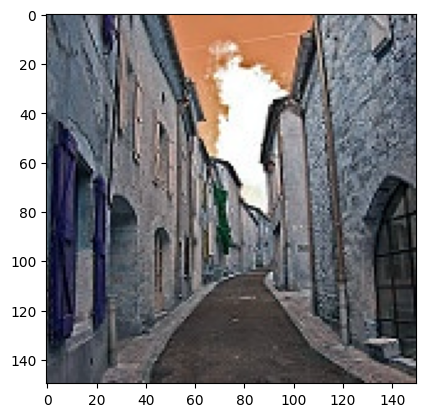

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(150, 150, 3)

In [26]:
test_img=cv2.resize(test_img, (256,256))

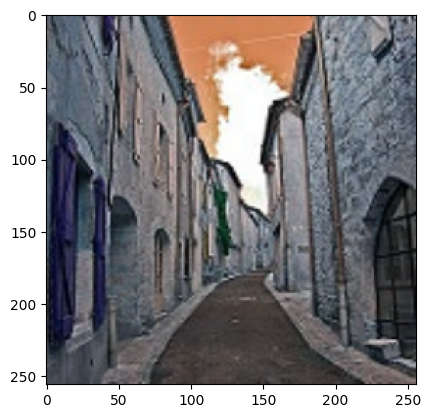

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(256, 256, 3)

In [29]:
test_input=test_img.reshape(1,256,256,3)

In [30]:
#classes=['buildings','forest','glacier','mountain','sea','street']
model.predict(test_input)[0][0]


1/1 [==============================] - 0s 309ms/step


0.0

0

In [31]:
output=model.predict(test_input)[0][0]

if output < 0.7:
    print('The given photo is a building')
elif 0.7 < output < 1.7:
    print('The given photo is a forest')
elif 1.7 < output < 2.7:
    print('The given photo is a glacier')
elif 2.7 < output < 3.7:
    print('The given photo is a mountain')
elif 3.7 < output < 4.7:
    print('The given photo is a sea')
elif output >= 4.7:
    print('The given photo is a street')

1/1 [==============================] - 0s 17ms/step
The given photo is a building
